# Dataset
Credit Card Customer Dataset   
Dataset can be found in: https://www.kaggle.com/sakshigoyal7/credit-card-customers

### What is inside the dataset? 

* **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
* **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age:** Demographic variable - Customer's Age in Years
* **Gender:** Demographic variable - M=Male, F=Female
* **Dependent_count:** Demographic variable - Number of dependents
* **Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* **Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown
* **Income_Category:** Demographic variable - Annual Income Category of the account holder (<40K, 40K-60K, 60K-80K, 80K-120K, >120K)

* **Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* **Months_on_book:** Period of relationship with bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio:** Average Card Utilization Ratio

## Problem Statement

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

## Essential Libraries

Importing the essential Python Libraries.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Machine Learning
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

#Import GridSearch
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Resample to balance classes
from sklearn.utils import resample

# Logistic Regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Import Dataset

In [2]:
o_data = pd.read_csv("BankChurners.csv", header=0)
o_data = o_data.copy().iloc[:,0:-2]
o_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(o_data))
print("Data dims : ", o_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10127, 21)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
o_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

It would seem that there are `10127` rows and `21` columns.  

## Clean and transform the data
It seems that **none of the columns have NULL values**, based on previous cells.  
Convert values to numeric values. 

In [5]:
obj_cols = o_data.columns[o_data.dtypes == 'object']
obj_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [6]:
o_data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [7]:
o_data.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [8]:
o_data.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [9]:
o_data.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [10]:
o_data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [11]:
o_data.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

 sklearn models do not handle categorical variables directly.   
 Convert the categorical values to numerical. 

In [12]:
#Convert the Response to binary, 0 and 1
o_data['Attrition_Flag'] = o_data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1}).astype(int)

#Any other conversion? 
o_data['Income_Category-Unknown'] = o_data['Income_Category'].apply(lambda x: 1 if x == "Unknown" else 0)
o_data['Income_Category'] = o_data['Income_Category'].map({'Unknown':0,
                                                           'Less than $40K':1,
                                                           '$40K - $60K':2,
                                                           '$60K - $80K':3,
                                                           '$80K - $120K':4,
                                                           '$120K +':5}).astype(int)

#categorical data
cat_cols = o_data.columns[o_data.dtypes == 'object']
cat_data = o_data.loc[:,cat_cols]

#numeric data + response
num_cols = o_data.columns[(o_data.dtypes == 'int32')|(o_data.dtypes == 'int64')|(o_data.dtypes == "float64")]
num_data = o_data.loc[:,num_cols]

In [13]:
o_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null int32
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null int32
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64

In [14]:
#One Hot Encoding for Categorical Data
ohe = OneHotEncoder()
ohe.fit(cat_data)
ohe_cat_data = pd.DataFrame(ohe.transform(cat_data).toarray(),
                           columns = ohe.get_feature_names_out(cat_data.columns))
ohe_cat_data.info()
ohe_cat_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
Gender_F                         10127 non-null float64
Gender_M                         10127 non-null float64
Education_Level_College          10127 non-null float64
Education_Level_Doctorate        10127 non-null float64
Education_Level_Graduate         10127 non-null float64
Education_Level_High School      10127 non-null float64
Education_Level_Post-Graduate    10127 non-null float64
Education_Level_Uneducated       10127 non-null float64
Education_Level_Unknown          10127 non-null float64
Marital_Status_Divorced          10127 non-null float64
Marital_Status_Married           10127 non-null float64
Marital_Status_Single            10127 non-null float64
Marital_Status_Unknown           10127 non-null float64
Card_Category_Blue               10127 non-null float64
Card_Category_Gold               10127 non-null float64
Card_Category_Platinum           10127 non-null flo

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10125,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [15]:
#Combine the numeric and categorical and response together
data = pd.concat([num_data,ohe_cat_data],
                sort=False,axis=1).reindex()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 35 columns):
CLIENTNUM                        10127 non-null int64
Attrition_Flag                   10127 non-null int32
Customer_Age                     10127 non-null int64
Dependent_count                  10127 non-null int64
Income_Category                  10127 non-null int32
Months_on_book                   10127 non-null int64
Total_Relationship_Count         10127 non-null int64
Months_Inactive_12_mon           10127 non-null int64
Contacts_Count_12_mon            10127 non-null int64
Credit_Limit                     10127 non-null float64
Total_Revolving_Bal              10127 non-null int64
Avg_Open_To_Buy                  10127 non-null float64
Total_Amt_Chng_Q4_Q1             10127 non-null float64
Total_Trans_Amt                  10127 non-null int64
Total_Trans_Ct                   10127 non-null int64
Total_Ct_Chng_Q4_Q1              10127 non-null float64
Avg_Utilization_Rat

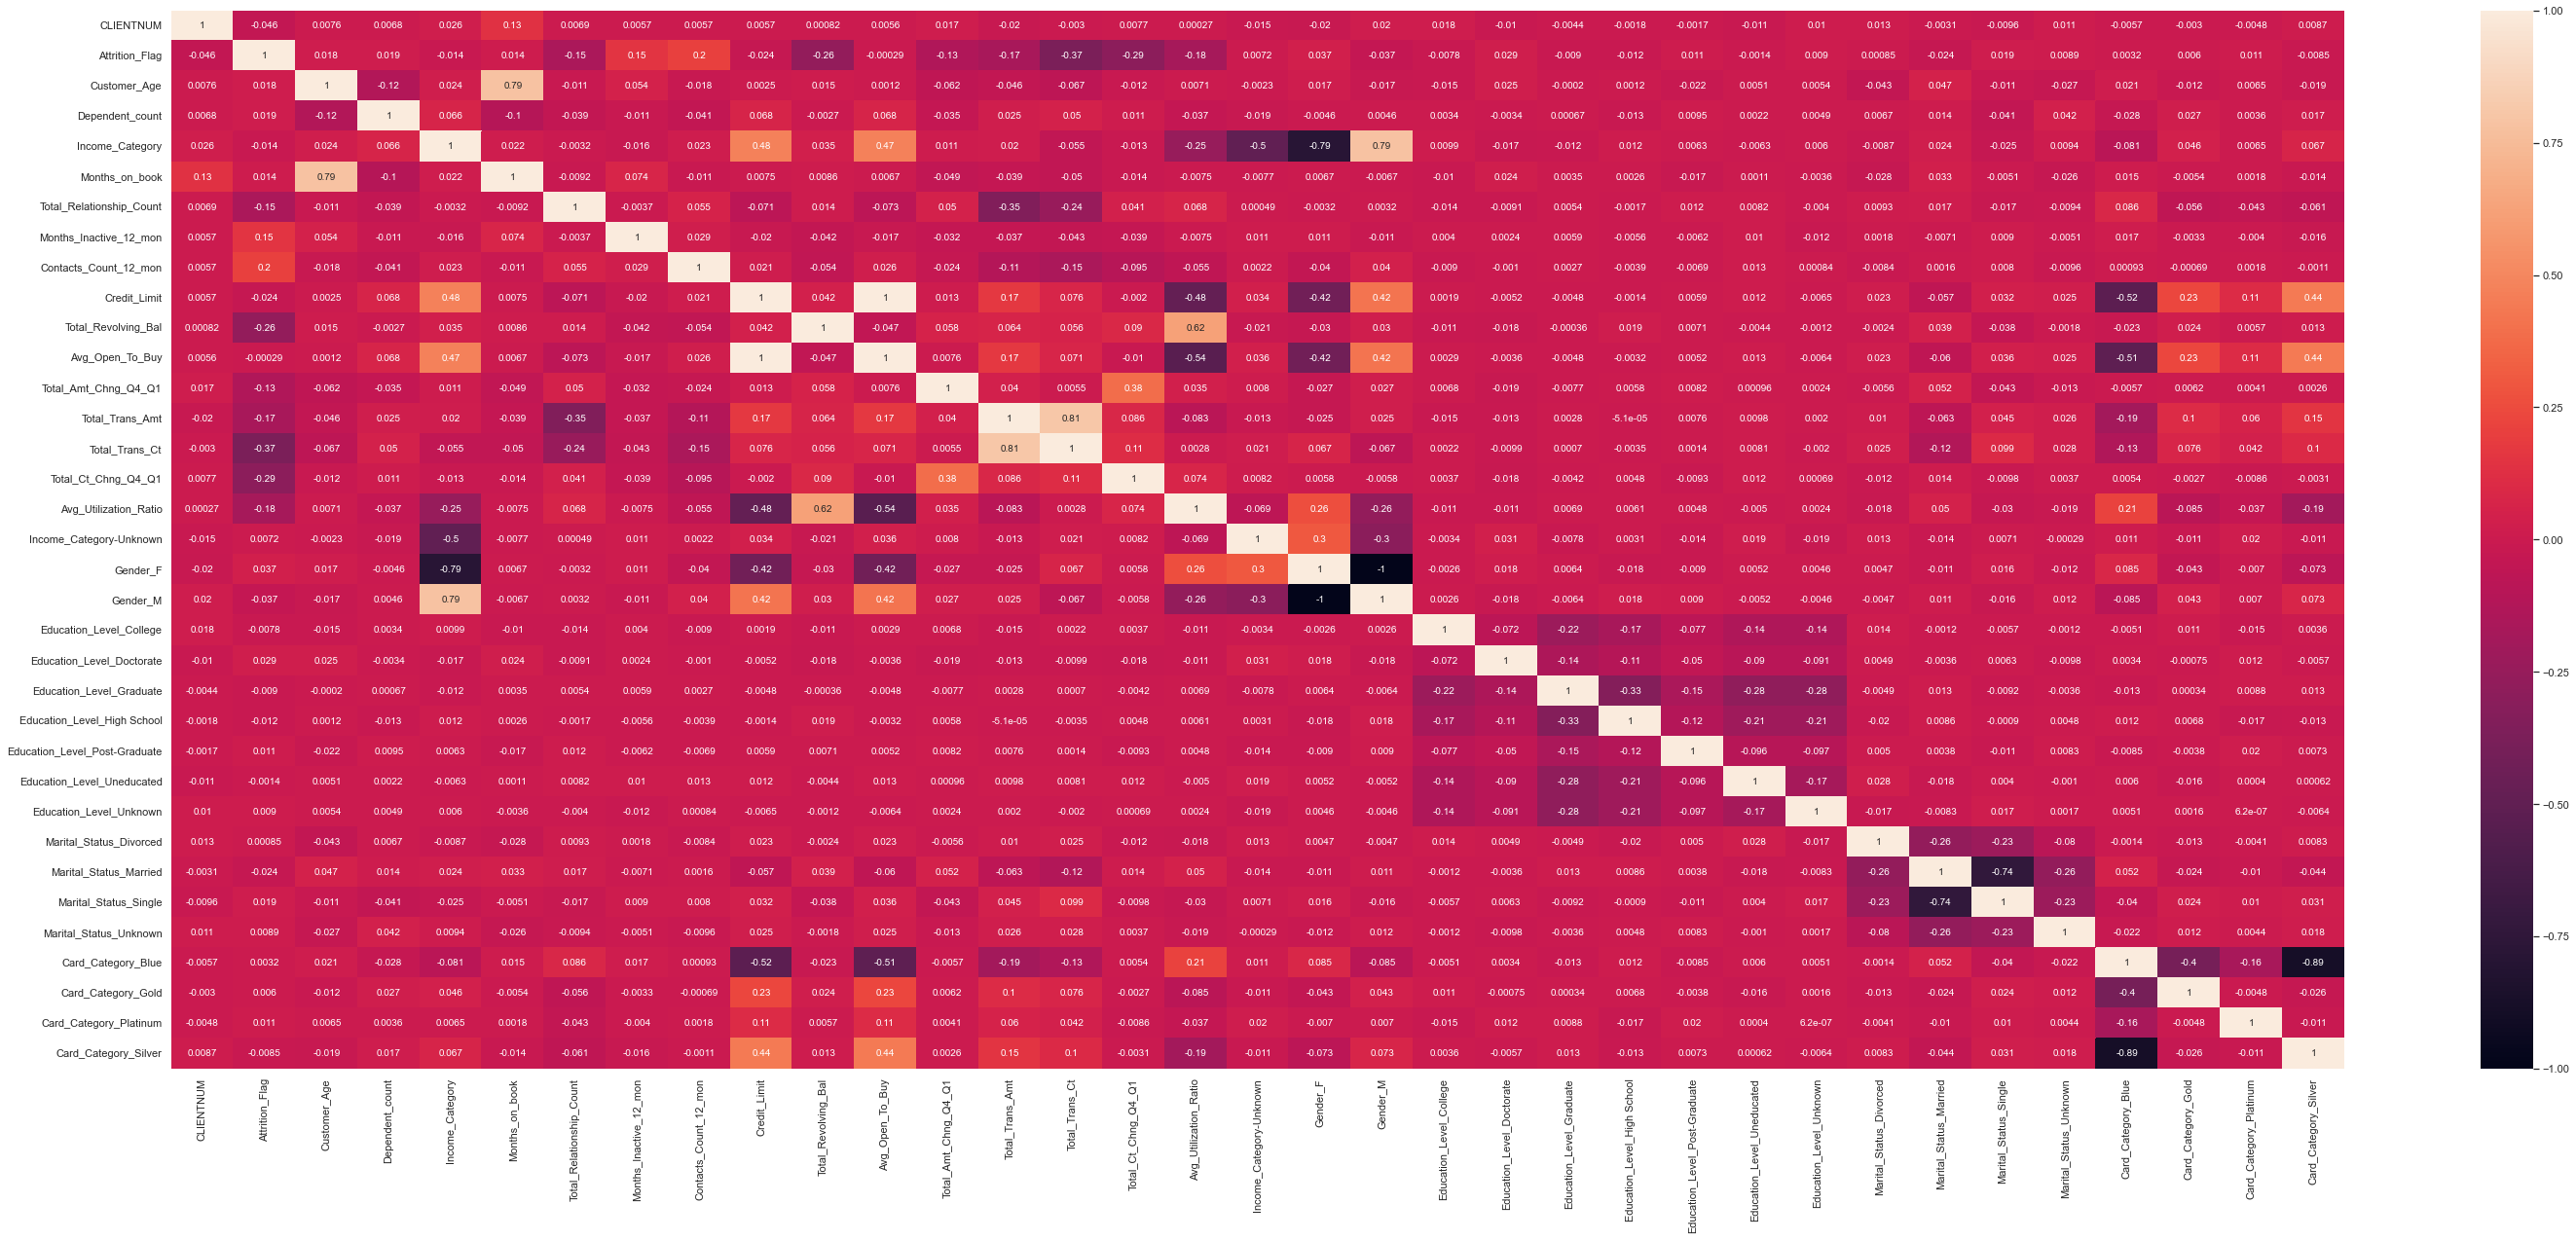

In [17]:
# Calculating the correlation matrix
corr = data.corr()
# Generating a heatmap
plt.figure(figsize=(50,20))
ax = sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True,)

#ensure that top and bottom rows aren't cut off
b, t = plt.ylim() # discover the values for bottom and top
#plt.ylim(b + 0.5, t - 0.5)

# Logistic Regresion

### Train Test Split

In [18]:
df_X = data.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy'])
df_y = data.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [19]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(10127, 32)
(10127,)
(7088, 32)
(7088,)
(3039, 32)
(3039,)


### Logistic Regresstion

In [20]:
#train the model 
lg = LogisticRegression(random_state = 2,
                       solver = 'lbfgs',
                       max_iter = 10000,
                       C=1e8)
lg.fit(X_train, y_train)

LogisticRegression(C=100000000.0, max_iter=10000, random_state=2)

In [21]:
print (lg.coef_)
print (lg.intercept_)

[[ 3.32932533e-02  1.67401984e-01 -5.92490950e-02 -1.15753576e-02
  -3.87594514e-01  6.46951000e-01  6.87120192e-01  3.37211038e-06
  -8.79148816e-04 -1.04301489e-01  3.98237322e-04 -1.03475990e-01
  -3.48160271e-01  1.15851572e-02  2.78125648e-02  2.96300831e-01
  -1.69752962e-01  1.20930764e-03  4.13588248e-02  3.73836657e-02
  -1.19430284e-02  3.06711912e-02  1.95502590e-02  8.31764947e-03
   1.39184829e-02 -1.74405871e-01  2.41242253e-01  4.57930048e-02
   6.47208097e-02  3.16209452e-02  9.26524145e-03  2.09408730e-02]]
[0.12654787]


In [22]:
#accuracy
train_acc = lg.score(X_train,y_train)
test_acc = lg.score(X_test,y_test)
print ("the training accuracy is: ", train_acc)
print ("the testing accuracy is: ", test_acc)

the training accuracy is:  0.8909424379232506
the testing accuracy is:  0.8897663705166173


                   precision    recall  f1-score   support

Existing Customer       0.91      0.97      0.94      2556
Attrited Customer       0.73      0.49      0.58       483

         accuracy                           0.89      3039
        macro avg       0.82      0.73      0.76      3039
     weighted avg       0.88      0.89      0.88      3039



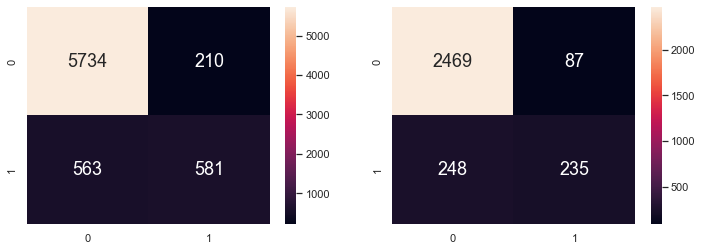

In [23]:
#Confusion matrix
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [24]:
Cs = np.logspace(-5, 8, 15)
max_iter = [100,1000,10000,100000]

param_grid = {'C':Cs, 'max_iter': max_iter}

gs = GridSearchCV(lg, param_grid= param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
#ouput --> the parameters used to produced the best score (highest accuracy)
best_param = gs.best_params_
lg = LogisticRegression(random_state = 2,
                       solver = 'lbfgs',
                       max_iter = best_param['max_iter'],
                       C=best_param['C'])
lg.fit(X_train, y_train)

0.8978532667160717
{'C': 100000000.0, 'max_iter': 10000}


LogisticRegression(C=100000000.0, max_iter=10000, random_state=2)

the training accuracy is:  0.8909424379232506
the testing accuracy is:  0.8897663705166173

                   precision    recall  f1-score   support

Existing Customer       0.91      0.97      0.94      2556
Attrited Customer       0.73      0.49      0.58       483

         accuracy                           0.89      3039
        macro avg       0.82      0.73      0.76      3039
     weighted avg       0.88      0.89      0.88      3039



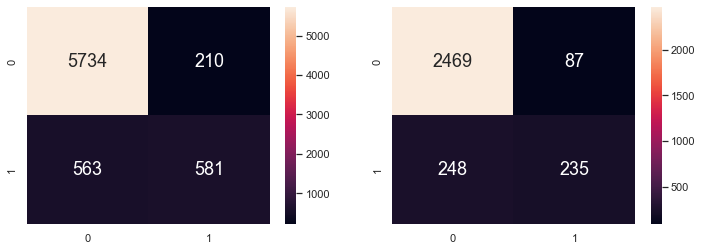

In [25]:
# accuracy 
train_acc = lg.score(X_train,y_train)
test_acc = lg.score(X_test,y_test)
print ("the training accuracy is: ", train_acc)
print ("the testing accuracy is: ", test_acc)
print ()

#Confusion matrix
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [26]:
X_train

array([[44.,  2.,  2., ...,  0.,  0.,  0.],
       [26.,  0.,  1., ...,  0.,  0.,  0.],
       [45.,  4.,  0., ...,  0.,  0.,  0.],
       ...,
       [42.,  4.,  1., ...,  0.,  0.,  0.],
       [47.,  1.,  4., ...,  0.,  0.,  1.],
       [58.,  1.,  1., ...,  0.,  0.,  0.]])

### Feature Importance
variables with P value of < 0.05 has higher significance in predicting churn. 

In [27]:
df_X.columns

Index(['Customer_Age', 'Dependent_count', 'Income_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income_Category-Unknown', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [28]:
X_train_sm = sm.add_constant(X_train)
details = sm.Logit(y_train, X_train_sm).fit()
details.summary()

Optimization terminated successfully.
         Current function value: 0.231307
         Iterations 9


C:\Users\phoeb\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\phoeb\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\phoeb\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\phoeb\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7059
Method:                           MLE   Df Model:                           28
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.4767
Time:                        23:17:48   Log-Likelihood:                -1639.5
converged:                       True   LL-Null:                       -3132.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1539   5.37e+06  -4.01e-07      1.000   -1.05e+07    1.05e+07
x1            -0.0059      0.009     -0.626      0.532      -0.024       0.013
x2             0.1465      0.036      4.062      0.000       0.076       0.217
x3             0.2061      0.063      3.292      0.001       0.083       0.329
x4            -0.0043      0.009     -0.458      0.647      -0.022       0.014
x5            -0.4627      0.033    -13.887      0.000      -0.528      -0.397
x6             0.5129      0.045     11.306      0.000       0.424       0.602
x7             0.4948      0.043     11.394      0.000       0.410       0.580
x8         -2.261e-05   8.41e-06     -2.689      0.007   -3.91e-05   -6.13e-06
x9            -0.0009   8.67e-05    -10.059      0.000      -0.001      -0.001
x10           -0.4690      0.227     -2.068      0.039      -0.913      -0.024
x11            0.0005   2.79e-05     16.516      0.000       0.000       0.001
x12           -0.1163      0.004    -26.159      0.000      -0.125      -0.108
x13           -2.8850      0.232    -12.451      0.000      -3.339      -2.431
x14           -0.1608      0.298     -0.540      0.589      -0.744       0.423
x15            0.2336      0.190      1.232      0.218      -0.138       0.605
x16            6.5656        nan        nan        nan         nan         nan
x17            5.4967        nan        nan        nan         nan         nan
x18            1.3855   4.59e+06   3.02e-07      1.000   -8.99e+06    8.99e+06
x19            1.8005   4.57e+06   3.94e-07      1.000   -8.95e+06    8.95e+06
x20            1.4592   4.47e+06   3.27e-07      1.000   -8.76e+06    8.76e+06
x21            1.3812   4.57e+06   3.02e-07      1.000   -8.95e+06    8.95e+06
x22            1.6095   4.52e+06   3.56e-07      1.000   -8.85e+06    8.85e+06
x23            1.4354   4.51e+06   3.18e-07      1.000   -8.84e+06    8.84e+06
x24            1.3759   4.56e+06   3.02e-07      1.000   -8.93e+06    8.93e+06
x25           -0.0891        nan        nan        nan         nan         nan
x26           -0.3314        nan        nan        nan         nan         nan
x27            0.2178        nan        nan        nan         nan         nan
x28            0.1277        nan        nan        nan         nan         nan
x29           -0.1827        nan        nan        nan         nan         nan
x30            1.3512        nan        nan        nan         nan         nan
x31            1.3523        nan        nan        nan         nan         nan
x32            0.3061        nan        nan        nan         nan         nan
==============================================================================
"""

In [29]:
df_X.columns[16:22]

Index(['Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate'],
      dtype='object')

The section on features importance depicts some errors and it's possibly due to the correlations between the categorical values of the same variable. Repeat the step, removing some of those variables. 

### Train Test Split

In [30]:
df_X = data.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy',"Gender_M","Marital_Status_Single","Card_Category_Blue"])
df_y = data.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [31]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(10127, 29)
(10127,)
(7088, 29)
(7088,)
(3039, 29)
(3039,)


### Logistic Regresstion

In [32]:
#train the model 
lg = LogisticRegression(random_state = 2,
                       solver = 'lbfgs',
                       max_iter = 10000,
                       C=1e8)
lg.fit(X_train, y_train)

LogisticRegression(C=100000000.0, max_iter=10000, random_state=2)

In [33]:
print (lg.coef_)
print (lg.intercept_)

[[ 3.50251373e-02  3.79916042e-01 -4.64034344e-02 -5.04098295e-03
  -4.28931610e-01  4.89023276e-01  5.86442768e-01 -8.16762343e-06
  -9.07502521e-04 -3.42991186e-02  3.74878306e-04 -1.00367849e-01
  -1.25034283e-01  5.72353872e-03  1.91225325e-02  1.37978843e-01
   2.64827453e-03  1.73200151e-02  1.86470613e-02 -4.43965273e-03
   1.04029314e-02  1.05396484e-02  8.13298132e-03  6.39132782e-03
  -6.69760041e-02  1.76881815e-02  1.14528747e-02  3.48033695e-03
   5.90100938e-03]]
[0.06325126]


In [34]:
#accuracy
train_acc = lg.score(X_train,y_train)
test_acc = lg.score(X_test,y_test)
print ("the training accuracy is: ", train_acc)
print ("the testing accuracy is: ", test_acc)

the training accuracy is:  0.8886851015801355
the testing accuracy is:  0.8907535373478118


                   precision    recall  f1-score   support

Existing Customer       0.91      0.97      0.94      2556
Attrited Customer       0.74      0.48      0.58       483

         accuracy                           0.89      3039
        macro avg       0.83      0.72      0.76      3039
     weighted avg       0.88      0.89      0.88      3039



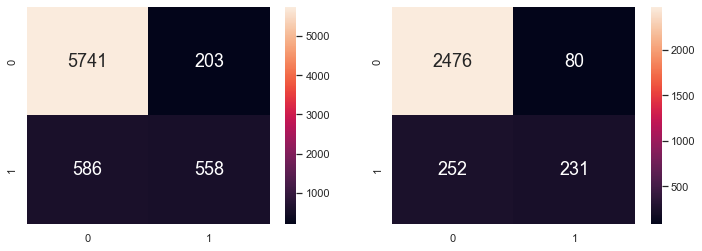

In [35]:
#Confusion matrix
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [36]:
Cs = np.logspace(-5, 8, 15)
max_iter = [100,1000,10000,100000]

param_grid = {'C':Cs, 'max_iter': max_iter}

gs = GridSearchCV(lg, param_grid= param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
#ouput --> the parameters used to produced the best score (highest accuracy)
best_param = gs.best_params_
lg = LogisticRegression(random_state = 2,
                       solver = 'lbfgs',
                       max_iter = best_param['max_iter'],
                       C=best_param['C'])
lg.fit(X_train, y_train)

0.8998302694174176
{'C': 163789.3706954068, 'max_iter': 10000}


LogisticRegression(C=163789.3706954068, max_iter=10000, random_state=2)

the training accuracy is:  0.8886851015801355
the testing accuracy is:  0.8907535373478118

                   precision    recall  f1-score   support

Existing Customer       0.91      0.97      0.94      2556
Attrited Customer       0.74      0.48      0.58       483

         accuracy                           0.89      3039
        macro avg       0.83      0.72      0.76      3039
     weighted avg       0.88      0.89      0.88      3039



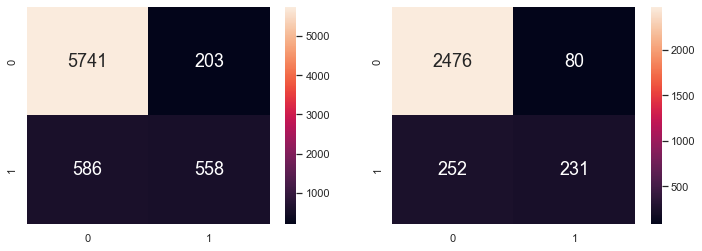

In [37]:
# accuracy 
train_acc = lg.score(X_train,y_train)
test_acc = lg.score(X_test,y_test)
print ("the training accuracy is: ", train_acc)
print ("the testing accuracy is: ", test_acc)
print ()

#Confusion matrix
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [38]:
X_train

array([[44.,  2.,  2., ...,  0.,  0.,  0.],
       [26.,  0.,  1., ...,  0.,  0.,  0.],
       [45.,  4.,  0., ...,  0.,  0.,  0.],
       ...,
       [42.,  4.,  1., ...,  0.,  0.,  0.],
       [47.,  1.,  4., ...,  0.,  0.,  1.],
       [58.,  1.,  1., ...,  0.,  0.,  0.]])

### Feature Importance
variables with P value of < 0.05 has higher significance in predicting churn. 

In [39]:
df_X.columns

Index(['Customer_Age', 'Dependent_count', 'Income_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income_Category-Unknown', 'Gender_F', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [40]:
X_train_sm = sm.add_constant(X_train)
details = sm.Logit(y_train, X_train_sm).fit()
details.summary()

Optimization terminated successfully.
         Current function value: 0.231307
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7059
Method:                           MLE   Df Model:                           28
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.4767
Time:                        23:19:50   Log-Likelihood:                -1639.5
converged:                       True   LL-Null:                       -3132.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2615   3.59e+06   1.19e-06      1.000   -7.04e+06    7.04e+06
x1            -0.0059      0.009     -0.626      0.532      -0.024       0.013
x2             0.1465      0.036      4.062      0.000       0.076       0.217
x3             0.2061      0.063      3.292      0.001       0.083       0.329
x4            -0.0043      0.009     -0.458      0.647      -0.022       0.014
x5            -0.4627      0.033    -13.887      0.000      -0.528      -0.397
x6             0.5129      0.045     11.306      0.000       0.424       0.602
x7             0.4948      0.043     11.394      0.000       0.410       0.580
x8         -2.261e-05   8.41e-06     -2.689      0.007   -3.91e-05   -6.13e-06
x9            -0.0009   8.67e-05    -10.059      0.000      -0.001      -0.001
x10           -0.4690      0.227     -2.068      0.039      -0.913      -0.024
x11            0.0005   2.79e-05     16.516      0.000       0.000       0.001
x12           -0.1163      0.004    -26.159      0.000      -0.125      -0.108
x13           -2.8850      0.232    -12.451      0.000      -3.339      -2.431
x14           -0.1608      0.298     -0.540      0.589      -0.744       0.423
x15            0.2336      0.190      1.232      0.218      -0.138       0.605
x16            1.0689      0.154      6.937      0.000       0.767       1.371
x17            0.5019   3.59e+06    1.4e-07      1.000   -7.04e+06    7.04e+06
x18            0.9168   3.59e+06   2.55e-07      1.000   -7.04e+06    7.04e+06
x19            0.5755   3.59e+06    1.6e-07      1.000   -7.04e+06    7.04e+06
x20            0.4976   3.59e+06   1.39e-07      1.000   -7.04e+06    7.04e+06
x21            0.7259   3.59e+06   2.02e-07      1.000   -7.04e+06    7.04e+06
x22            0.5517   3.59e+06   1.54e-07      1.000   -7.04e+06    7.04e+06
x23            0.4922   3.59e+06   1.37e-07      1.000   -7.04e+06    7.04e+06
x24           -0.3069      0.193     -1.588      0.112      -0.686       0.072
x25           -0.5493      0.101     -5.446      0.000      -0.747      -0.352
x26           -0.0901      0.177     -0.509      0.611      -0.437       0.257
x27            1.5340      0.398      3.857      0.000       0.754       2.313
x28            1.5350      0.798      1.924      0.054      -0.029       3.099
x29            0.4888      0.236      2.075      0.038       0.027       0.951
==============================================================================
"""

In [41]:
df_X.columns[16:22]

Index(['Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated'],
      dtype='object')

# Logistic Regression + Resampling Data
Noticing that the data is very skewed as only 1627 of the 10127 data was for "Attrited Customer" response, we decided to do resampling to balance the classes

### Resample Data

In [42]:
# Get different response sample
attrited_data = data[data.Attrition_Flag == 1]
existing_data = data[data.Attrition_Flag == 0]
 
# Upsample the Bad samples
attrited_data_up = resample(attrited_data, 
                            replace=True,                       # sample with replacement
                            n_samples=existing_data.shape[0])   # to match number of existing
 
# Combine the two classes back after upsampling
data_up = pd.concat([existing_data, attrited_data_up])
 
# Check the ratio of the classes
data_up['Attrition_Flag'].value_counts()

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

### Train Test Split

In [43]:
df_X = data_up.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy'])
df_y = data_up.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [44]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(17000, 32)
(17000,)
(11900, 32)
(11900,)
(5100, 32)
(5100,)


### Logistic Regresstion

In [45]:
#train the model 
lg = LogisticRegression(random_state = 2,
                       solver = 'lbfgs',
                       max_iter = 10000,
                       C=1e8)
lg.fit(X_train, y_train)

LogisticRegression(C=100000000.0, max_iter=10000, random_state=2)

In [46]:
print (lg.coef_)
print (lg.intercept_)

[[ 3.73163975e-02  1.92164279e-01  3.85625901e-01 -1.82699014e-02
  -2.59613818e-01  6.77327795e-01  5.41580803e-01  1.22272747e-06
  -7.83977990e-04 -1.77742172e-01  5.02095013e-04 -1.19908138e-01
  -1.03062091e+00  3.49104159e-02 -9.79380188e-04  1.08658970e+00
  -4.10561362e-01  1.07347017e-01  1.84127976e-01  3.55587056e-02
   4.45091227e-02  1.69022999e-01  9.01428195e-02  4.53196970e-02
   1.58019816e-01 -3.11384116e-01  6.50543899e-01  1.78848738e-01
   5.07747105e-01  1.21904936e-01  1.77139553e-02  2.86623415e-02]]
[0.67602834]


In [47]:
#accuracy
train_acc = lg.score(X_train,y_train)
test_acc = lg.score(X_test,y_test)
print ("the training accuracy is: ", train_acc)
print ("the testing accuracy is: ", test_acc)

the training accuracy is:  0.8346218487394959
the testing accuracy is:  0.8343137254901961


                   precision    recall  f1-score   support

Existing Customer       0.83      0.83      0.83      2482
Attrited Customer       0.84      0.84      0.84      2618

         accuracy                           0.83      5100
        macro avg       0.83      0.83      0.83      5100
     weighted avg       0.83      0.83      0.83      5100



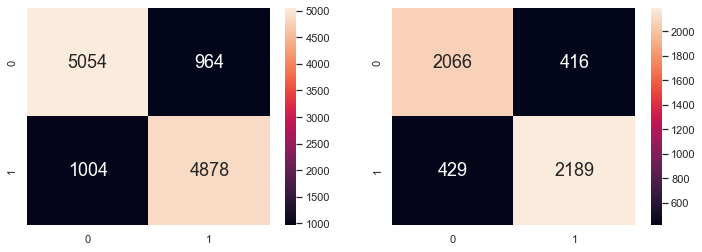

In [48]:
#Confusion matrix
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [49]:
Cs = np.logspace(-5, 8, 15)
max_iter = [100,1000,10000,100000]

param_grid = {'C':Cs, 'max_iter': max_iter}

gs = GridSearchCV(lg, param_grid= param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
#ouput --> the parameters used to produced the best score (highest accuracy)
best_param = gs.best_params_
lg = LogisticRegression(random_state = 2,
                       solver = 'lbfgs',
                       max_iter = best_param['max_iter'],
                       C=best_param['C'])
lg.fit(X_train, y_train)

0.8352941176470587
{'C': 163789.3706954068, 'max_iter': 10000}


LogisticRegression(C=163789.3706954068, max_iter=10000, random_state=2)

the training accuracy is:  0.8233613445378152
the testing accuracy is:  0.8235294117647058

                   precision    recall  f1-score   support

Existing Customer       0.81      0.82      0.82      2482
Attrited Customer       0.83      0.82      0.83      2618

         accuracy                           0.82      5100
        macro avg       0.82      0.82      0.82      5100
     weighted avg       0.82      0.82      0.82      5100



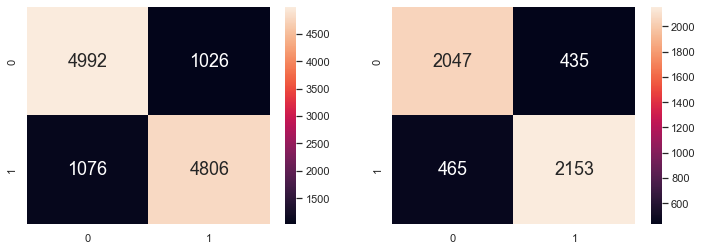

In [50]:
# accuracy 
train_acc = lg.score(X_train,y_train)
test_acc = lg.score(X_test,y_test)
print ("the training accuracy is: ", train_acc)
print ("the testing accuracy is: ", test_acc)
print ()

#Confusion matrix
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [51]:
X_train

array([[46.,  3.,  1., ...,  0.,  0.,  0.],
       [48.,  3.,  1., ...,  0.,  0.,  0.],
       [33.,  3.,  2., ...,  0.,  0.,  0.],
       ...,
       [53.,  1.,  3., ...,  0.,  0.,  0.],
       [59.,  2.,  1., ...,  0.,  0.,  0.],
       [43.,  2.,  5., ...,  0.,  0.,  1.]])

### Feature Importance
variables with P value of < 0.05 has higher significance in predicting churn. 

In [52]:
df_X.columns

Index(['Customer_Age', 'Dependent_count', 'Income_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income_Category-Unknown', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [53]:
X_train_sm = sm.add_constant(X_train)
details = sm.Logit(y_train, X_train_sm).fit()
details.summary()

         Current function value: 0.347285
         Iterations: 35


C:\Users\phoeb\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\phoeb\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\phoeb\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\phoeb\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\phoeb\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                11900
Model:                          Logit   Df Residuals:                    11871
Method:                           MLE   Df Model:                           28
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.4989
Time:                        23:25:24   Log-Likelihood:                -4132.7
converged:                      False   LL-Null:                       -8247.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3975   9.79e+05   3.47e-06      1.000   -1.92e+06    1.92e+06
x1            -0.0031      0.006     -0.537      0.591      -0.014       0.008
x2             0.0799      0.022      3.584      0.000       0.036       0.124
x3             0.1744      0.039      4.493      0.000       0.098       0.250
x4            -0.0147      0.006     -2.596      0.009      -0.026      -0.004
x5            -0.3583      0.019    -18.780      0.000      -0.396      -0.321
x6             0.5167      0.029     17.626      0.000       0.459       0.574
x7             0.5166      0.027     19.181      0.000       0.464       0.569
x8         -8.531e-06   4.96e-06     -1.720      0.085   -1.83e-05    1.19e-06
x9            -0.0008   4.88e-05    -15.898      0.000      -0.001      -0.001
x10           -0.5908      0.141     -4.184      0.000      -0.868      -0.314
x11            0.0005   1.73e-05     30.868      0.000       0.001       0.001
x12           -0.1284      0.003    -45.130      0.000      -0.134      -0.123
x13           -2.5512      0.135    -18.884      0.000      -2.816      -2.286
x14           -0.2843      0.173     -1.640      0.101      -0.624       0.055
x15           -0.0661      0.116     -0.569      0.569      -0.294       0.161
x16            2.2003        nan        nan        nan         nan         nan
x17            1.1972        nan        nan        nan         nan         nan
x18            0.3627        nan        nan        nan         nan         nan
x19            0.7049        nan        nan        nan         nan         nan
x20            0.3509        nan        nan        nan         nan         nan
x21            0.4125        nan        nan        nan         nan         nan
x22            0.6884        nan        nan        nan         nan         nan
x23            0.4772        nan        nan        nan         nan         nan
x24            0.4008        nan        nan        nan         nan         nan
x25            0.8859   1.29e+06   6.87e-07      1.000   -2.53e+06    2.53e+06
x26            0.5125   1.24e+06   4.12e-07      1.000   -2.44e+06    2.44e+06
x27            1.0506   1.26e+06   8.37e-07      1.000   -2.46e+06    2.46e+06
x28            0.9485   1.26e+06   7.53e-07      1.000   -2.47e+06    2.47e+06
x29            0.5545        nan        nan        nan         nan         nan
x30            1.3912        nan        nan        nan         nan         nan
x31            0.9374        nan        nan        nan         nan         nan
x32            0.5144        nan        nan        nan         nan         nan
==============================================================================
"""

In [54]:
df_X.columns[16:22]

Index(['Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate'],
      dtype='object')

The section on features importance depicts some errors and it's possibly due to the correlations between the categorical values of the same variable. Repeat the step, removing some of those variables. 

### Train Test Split

In [55]:
df_X = data_up.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy',"Gender_M","Marital_Status_Single","Card_Category_Blue"])
df_y = data_up.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [56]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(17000, 29)
(17000,)
(11900, 29)
(11900,)
(5100, 29)
(5100,)


### Logistic Regresstion

In [57]:
#train the model 
lg = LogisticRegression(random_state = 2,
                       solver = 'lbfgs',
                       max_iter = 10000,
                       C=1e8)
lg.fit(X_train, y_train)

LogisticRegression(C=100000000.0, max_iter=10000, random_state=2)

In [58]:
print (lg.coef_)
print (lg.intercept_)

[[ 5.45293193e-02  1.89656923e-01 -2.72241644e-02 -1.60109151e-02
  -3.04950059e-01  6.50598562e-01  7.34847515e-01  7.68482193e-07
  -7.54686166e-04 -2.16958987e-02  4.26165985e-04 -1.06294102e-01
  -1.91733712e-01  1.50466786e-02  2.56337519e-02  2.97683790e-01
   2.02489450e-02  4.07532616e-02  2.12337800e-02  6.05415230e-03
   3.31967506e-02  2.07106374e-02  2.10451946e-02  2.86252729e-02
  -1.21413610e-01  2.72952739e-02  2.27424152e-02  4.12306984e-03
  -2.88494650e-04]]
[0.16324272]


In [59]:
#accuracy
train_acc = lg.score(X_train,y_train)
test_acc = lg.score(X_test,y_test)
print ("the training accuracy is: ", train_acc)
print ("the testing accuracy is: ", test_acc)

the training accuracy is:  0.8229411764705883
the testing accuracy is:  0.823921568627451


                   precision    recall  f1-score   support

Existing Customer       0.82      0.82      0.82      2482
Attrited Customer       0.83      0.82      0.83      2618

         accuracy                           0.82      5100
        macro avg       0.82      0.82      0.82      5100
     weighted avg       0.82      0.82      0.82      5100



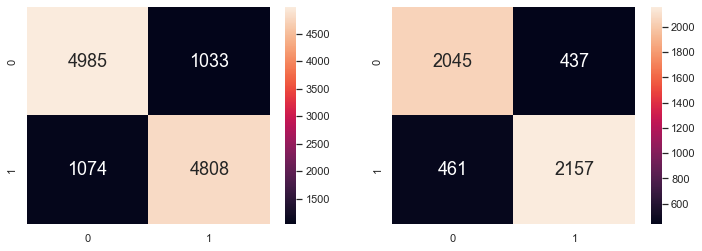

In [60]:
#Confusion matrix
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [61]:
Cs = np.logspace(-5, 8, 15)
max_iter = [100,1000,10000,100000]

param_grid = {'C':Cs, 'max_iter': max_iter}

gs = GridSearchCV(lg, param_grid= param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)
#ouput --> the parameters used to produced the best score (highest accuracy)
best_param = gs.best_params_
lg = LogisticRegression(random_state = 2,
                       solver = 'lbfgs',
                       max_iter = best_param['max_iter'],
                       C=best_param['C'])
lg.fit(X_train, y_train)

0.832016806722689
{'C': 100000000.0, 'max_iter': 10000}


LogisticRegression(C=100000000.0, max_iter=10000, random_state=2)

the training accuracy is:  0.8229411764705883
the testing accuracy is:  0.823921568627451

                   precision    recall  f1-score   support

Existing Customer       0.82      0.82      0.82      2482
Attrited Customer       0.83      0.82      0.83      2618

         accuracy                           0.82      5100
        macro avg       0.82      0.82      0.82      5100
     weighted avg       0.82      0.82      0.82      5100



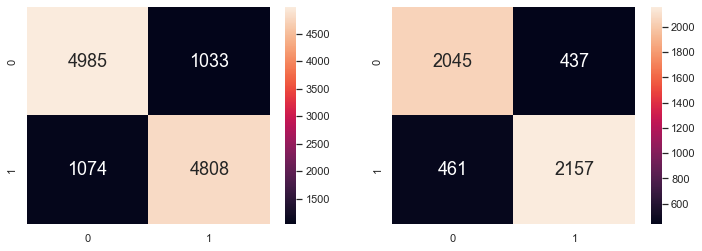

In [62]:
# accuracy 
train_acc = lg.score(X_train,y_train)
test_acc = lg.score(X_test,y_test)
print ("the training accuracy is: ", train_acc)
print ("the testing accuracy is: ", test_acc)
print ()

#Confusion matrix
y_test_pred = lg.predict(X_test)
y_train_pred = lg.predict(X_train)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [63]:
X_train

array([[46.,  3.,  1., ...,  0.,  0.,  0.],
       [48.,  3.,  1., ...,  0.,  0.,  0.],
       [33.,  3.,  2., ...,  0.,  0.,  0.],
       ...,
       [53.,  1.,  3., ...,  0.,  0.,  0.],
       [59.,  2.,  1., ...,  0.,  0.,  0.],
       [43.,  2.,  5., ...,  0.,  0.,  1.]])

### Feature Importance
variables with P value of < 0.05 has higher significance in predicting churn. 

In [64]:
df_X.columns

Index(['Customer_Age', 'Dependent_count', 'Income_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income_Category-Unknown', 'Gender_F', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Unknown', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [65]:
X_train_sm = sm.add_constant(X_train)
details = sm.Logit(y_train, X_train_sm).fit()
details.summary()

Optimization terminated successfully.
         Current function value: 0.347285
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                11900
Model:                          Logit   Df Residuals:                    11871
Method:                           MLE   Df Model:                           28
Date:                Sat, 23 Apr 2022   Pseudo R-squ.:                  0.4989
Time:                        23:29:41   Log-Likelihood:                -4132.7
converged:                       True   LL-Null:                       -8247.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8495   6.96e+06    8.4e-07      1.000   -1.36e+07    1.36e+07
x1            -0.0031      0.006     -0.537      0.591      -0.014       0.008
x2             0.0799      0.022      3.584      0.000       0.036       0.124
x3             0.1744      0.039      4.493      0.000       0.098       0.250
x4            -0.0147      0.006     -2.596      0.009      -0.026      -0.004
x5            -0.3583      0.019    -18.780      0.000      -0.396      -0.321
x6             0.5167      0.029     17.626      0.000       0.459       0.574
x7             0.5166      0.027     19.181      0.000       0.464       0.569
x8         -8.531e-06   4.96e-06     -1.720      0.085   -1.83e-05    1.19e-06
x9            -0.0008   4.88e-05    -15.898      0.000      -0.001      -0.001
x10           -0.5908      0.141     -4.184      0.000      -0.868      -0.314
x11            0.0005   1.73e-05     30.868      0.000       0.001       0.001
x12           -0.1284      0.003    -45.130      0.000      -0.134      -0.123
x13           -2.5512      0.135    -18.884      0.000      -2.816      -2.286
x14           -0.2843      0.173     -1.640      0.101      -0.624       0.055
x15           -0.0661      0.116     -0.569      0.569      -0.294       0.161
x16            1.0032      0.097     10.353      0.000       0.813       1.193
x17            0.7130   6.96e+06   1.02e-07      1.000   -1.36e+07    1.36e+07
x18            1.0552   6.96e+06   1.52e-07      1.000   -1.36e+07    1.36e+07
x19            0.7012   6.96e+06   1.01e-07      1.000   -1.36e+07    1.36e+07
x20            0.7628   6.96e+06    1.1e-07      1.000   -1.36e+07    1.36e+07
x21            1.0387   6.96e+06   1.49e-07      1.000   -1.36e+07    1.36e+07
x22            0.8275   6.96e+06   1.19e-07      1.000   -1.36e+07    1.36e+07
x23            0.7511   6.96e+06   1.08e-07      1.000   -1.36e+07    1.36e+07
x24           -0.1647      0.113     -1.461      0.144      -0.386       0.056
x25           -0.5380      0.062     -8.683      0.000      -0.659      -0.417
x26           -0.1020      0.111     -0.918      0.359      -0.320       0.116
x27            0.8367      0.255      3.285      0.001       0.338       1.336
x28            0.3829      0.486      0.787      0.431      -0.570       1.336
x29           -0.0401      0.143     -0.281      0.779      -0.320       0.240
==============================================================================
"""

In [66]:
df_X.columns[16:22]

Index(['Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated'],
      dtype='object')